# Flux Images

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import astroalign as aa
import time
import numpy.ma as ma

In [3]:
# Define fixed reference map for WCS
NGC_SN3_ref = fits.open('./interactiveBPT/NGC1275_lowres_deep.fits')[0]
mask = fits.open('./WIYN-Mask-SN3-lowres.fits')[0].data[750:1500, 900:1300]  # x and y swapped

NII/H\alpha vs OIII/H\beta

In [4]:
def clean_flux(data_):
    flux = data_
    #flux[np.isnan(flux)] = 1e-22
    #flux[flux<1e-22] = 1e-22
    #flux = np.log10(flux)
    #flux[flux<-22] = -22
    #flux[flux>-12] = -22
    return flux

In [25]:
    # Read in data
filter_deep = None  # Initialize
suffix = ''
data_OIII = clean_flux(fits.open('./NGC1275_SN2_3_sinc_OIII5007_Amplitude%s.fits'%(suffix))[0].data)
data_Hbeta = clean_flux(fits.open('./NGC1275_SN2_3_sinc_Hbeta_Amplitude%s.fits'%(suffix))[0].data)
data_Halpha = clean_flux(fits.open('./NGC1275_lowres_3_sinc_Halpha_Amplitude.fits')[0].data)
data_NII_1 = clean_flux(fits.open('./NGC1275_lowres_3_sinc_NII6548_Amplitude%s.fits'%(suffix))[0].data)
data_NII_2 = clean_flux(fits.open('./NGC1275_lowres_3_sinc_NII6583_Amplitude%s.fits'%(suffix))[0].data)
data_SII_1 = clean_flux(fits.open('./NGC1275_lowres_3_sinc_SII6716_Amplitude%s.fits'%(suffix))[0].data)
data_SII_2 = clean_flux(fits.open('./NGC1275_lowres_3_sinc_SII6731_Amplitude%s.fits'%(suffix))[0].data)
data_SII = data_SII_1 + data_SII_2


OIII_Hbeta = np.log10(data_OIII/data_Hbeta)  # Calculate OIII/Hbeta
NII_Halpha = np.log10((data_NII_2)/data_Halpha)  # Calculate NII/Halpha
SII_Halpha = np.log10(data_SII/data_Halpha)  # Calculate SII/Halpha

/tmp/ipykernel_628/541760526.py:14: RuntimeWarning: invalid value encountered in log10
  OIII_Hbeta = np.log10(data_OIII/data_Hbeta)  # Calculate OIII/Hbeta
/tmp/ipykernel_628/541760526.py:15: RuntimeWarning: invalid value encountered in log10
  NII_Halpha = np.log10((data_NII_2)/data_Halpha)  # Calculate NII/Halpha
/tmp/ipykernel_628/541760526.py:16: RuntimeWarning: invalid value encountered in log10
  SII_Halpha = np.log10(data_SII/data_Halpha)  # Calculate SII/Halpha


-0.046651937


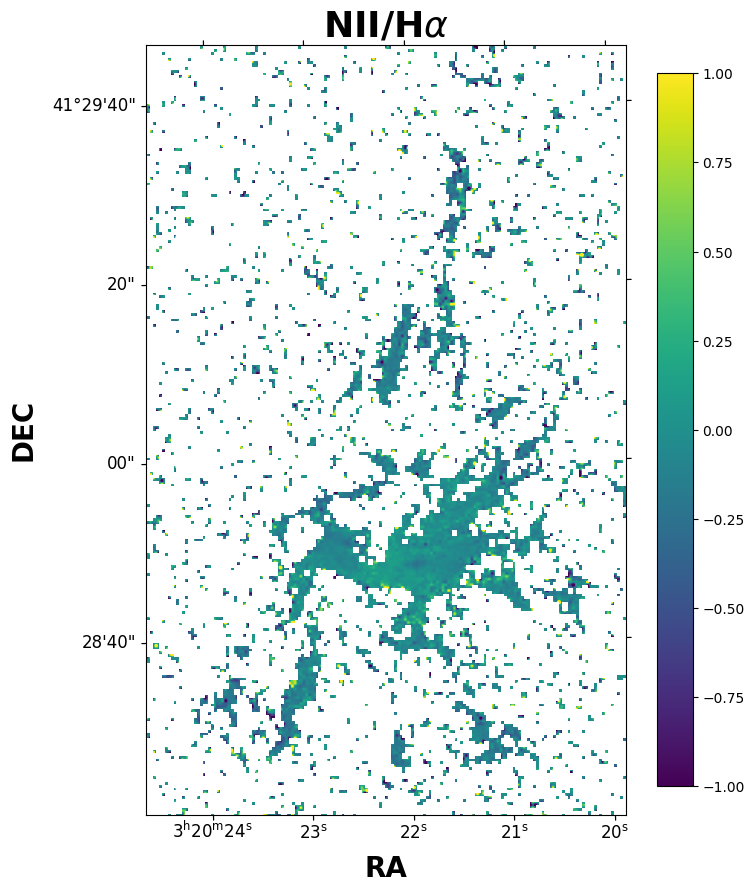

In [17]:
c_min = np.nanpercentile(NII_Halpha, 50)
c_max = np.nanpercentile(NII_Halpha, 99.)
wcs = WCS(NGC_SN3_ref.header)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')
plt.imshow(NII_Halpha, cmap='viridis')
plt.title(r'NII/H$\alpha$', fontsize=26, fontweight='bold')
plt.xlabel("RA", fontsize=20, fontweight='bold')
plt.ylabel("DEC", fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)    
#plt.ylim(750, 1500)
#plt.xlim(900, 1300)
cbar = plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(-1, 1)
cbar.ax.set_ylabel('', rotation=270, labelpad=25, fontsize=20, fontweight='bold')
print(np.nanmean(NII_Halpha))

Text(0, 0.5, '')

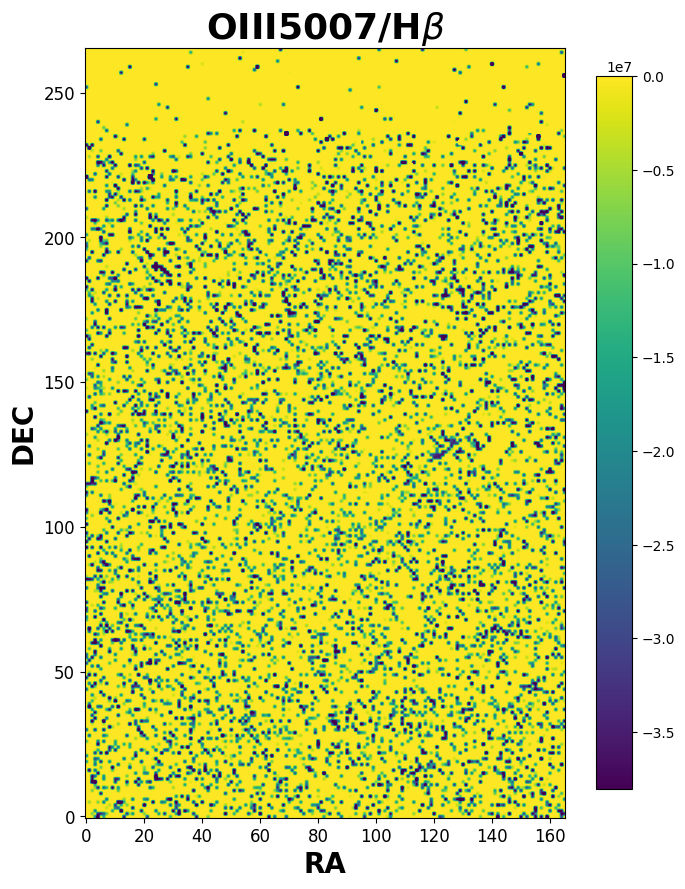

In [55]:
c_min = np.nanpercentile(OIII_Hbeta, 5)
c_max = np.nanpercentile(OIII_Hbeta, 99.5)
wcs = WCS(NGC_SN3_ref.header)
fig = plt.figure(figsize=(10, 10))
#ax = plt.subplot(projection=wcs)
#ax.coords[0].set_major_formatter('hh:mm:ss')
#ax.coords[1].set_major_formatter('dd:mm:ss')
plt.imshow(OIII_Hbeta, cmap='viridis', origin='lower')
plt.title(r'OIII5007/H$\beta$', fontsize=26, fontweight='bold')
plt.xlabel("RA", fontsize=20, fontweight='bold')
plt.ylabel("DEC", fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)    
cbar = plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(c_min, c_max)
cbar.ax.set_ylabel('', rotation=270, labelpad=25, fontsize=20, fontweight='bold')

Text(0, 0.5, '')

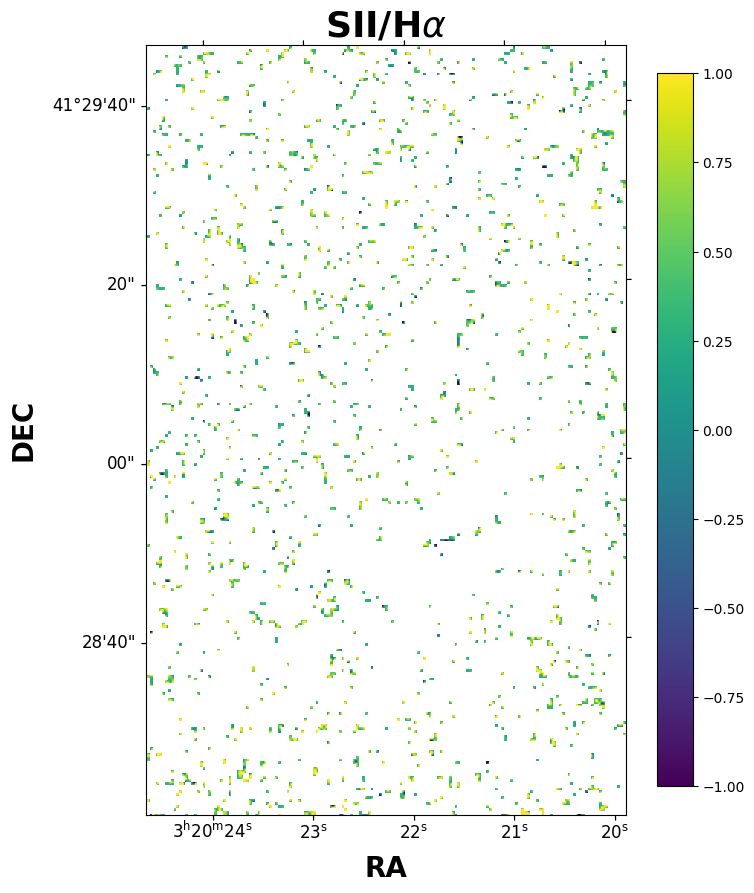

In [26]:
c_min = np.nanpercentile(SII_Halpha, 50)
c_max = np.nanpercentile(SII_Halpha, 99.)
wcs = WCS(NGC_SN3_ref.header)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')
plt.imshow(SII_Halpha, cmap='viridis')
plt.title(r'SII/H$\alpha$', fontsize=26, fontweight='bold')
plt.xlabel("RA", fontsize=20, fontweight='bold')
plt.ylabel("DEC", fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)    
#plt.ylim(750, 1500)
#plt.xlim(900, 1300)
cbar = plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(-1, 1)
cbar.ax.set_ylabel('', rotation=270, labelpad=25, fontsize=20, fontweight='bold')


In [22]:
def kaufmann(NII_Halpha):
    return 0.61/(NII_Halpha - 0.05) + 1.13

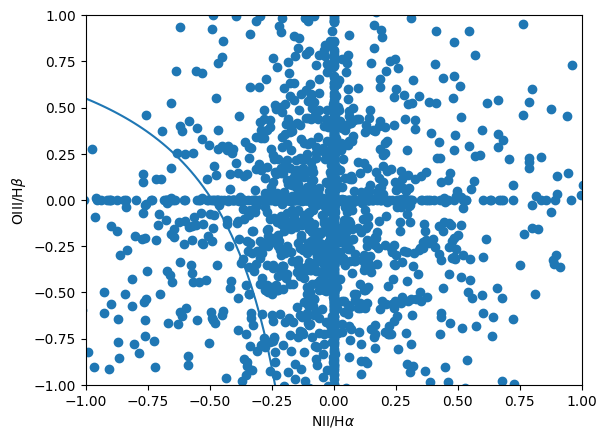

In [44]:
center_OIII_Hbeta = OIII_Hbeta[100:200, 60:120].flatten()
center_NII_Halpha = NII_Halpha[100:200, 60:120].flatten()
center_NII_Halpha = center_NII_Halpha[~np.isnan(center_OIII_Hbeta)]
center_OIII_Hbeta = center_OIII_Hbeta[~np.isnan(center_OIII_Hbeta)]
#Now NII Halpha
center_OIII_Hbeta = center_OIII_Hbeta[~np.isnan(center_NII_Halpha)]
center_NII_Halpha = center_NII_Halpha[~np.isnan(center_NII_Halpha)]
# And now to get rid of zeros in OII/Hbeta
center_NII_Halpha = center_NII_Halpha[center_OIII_Hbeta != 0]
center_OIII_Hbeta = center_OIII_Hbeta[center_OIII_Hbeta != 0]
# And now to get rid of zeros in NII/Halpha
center_OIII_Hbeta = center_OIII_Hbeta[center_NII_Halpha != 0]
center_NII_Halpha = center_NII_Halpha[center_NII_Halpha != 0]
plt.scatter(center_NII_Halpha, center_OIII_Hbeta)
plt.plot(np.linspace(-1, -0.2), kaufmann(np.linspace(-1, -.2)))
plt.xlabel(r'NII/H$\alpha$')
plt.ylabel(r'OIII/H$\beta$')
plt.ylim(-1, 1)
plt.xlim(-1,1)
plt.show()

In [53]:
bad_center_NII_Halpha = center_NII_Halpha[center_NII_Halpha > -0.01]
bad_center_NII_Halpha = bad_center_NII_Halpha[bad_center_NII_Halpha < 0.01]
print(bad_center_NII_Halpha)

[ 6.21262757e-07 -9.43906046e-03  1.03543854e-07  2.07087695e-07
  5.17719307e-08 -5.55643067e-03  1.21891475e-03 -9.04923957e-03
  8.43435992e-03  5.17719307e-08 -2.87335206e-06 -7.76579157e-08
  1.03543854e-07 -2.58859689e-08 -2.07087794e-07  1.62043125e-05
 -7.49204555e-05 -2.32973790e-07  1.19075287e-06 -2.36859382e-03
 -7.76579157e-08  1.55315774e-07 -4.37225308e-03 -9.57204215e-03
 -7.76579157e-08  5.17719307e-08  4.79290448e-03  1.55315774e-07
 -7.50693744e-07 -5.17719414e-08 -3.04002431e-03 -1.29430043e-06
  5.17719307e-08 -5.17719414e-08  5.17719307e-08  5.17719307e-08
  5.17719307e-08 -4.67407890e-03  1.55315774e-07 -9.06009859e-07
 -1.81201813e-07  1.55315774e-07  8.80122002e-07  5.69490908e-07
  5.17719307e-08  5.17719307e-08 -8.28351801e-07 -2.58859757e-07
  1.03543854e-07  1.03543854e-07  1.24252460e-06  2.14828691e-03
  4.10874514e-03  7.69829471e-03 -5.17719414e-08 -5.17719414e-08
 -8.46239179e-03 -5.63430879e-03  6.91639783e-04 -7.00806500e-04
 -5.17719414e-08 -5.17719